## Job Description Salary Prediction

In [95]:
# Load libraries
import pandas as pd
import numpy as np

# Data prep
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split

# Data prep for text column
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR 
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV

# Post model analysis
from sklearn.metrics import mean_squared_error

# Visualization
import matplotlib.pyplot as plt

# Set seed
np.random.seed(42)

In [96]:
# Load data file
df =  pd.read_csv(r"D:\Shyam\Documents\01 - Documents\Data Analytics Projects\jobs_alldata.csv")
df.head()

,Salary,Job Description,Location,Min_years_exp,Technical,Comm,Travel
0,67206,Civil Service Title: Regional Director Mental ...,Remote,5,2,3,0
1,88313,The New York City Comptrollerâ€™s Office Burea...,Remote,5,2,4,10-15
2,81315,With minimal supervision from the Deputy Commi...,East campus,5,3,3,5-10
3,76426,OPEN TO CURRENT BUSINESS PROMOTION COORDINATOR...,East campus,1,1,3,0
4,55675,Only candidates who are permanent in the Princ...,Southeast campus,1,1,3,5-10


### Descriptive and Visual Analysis

In [97]:
# Get an idea on the dataset

df.describe()

,Salary,Min_years_exp,Technical,Comm
count,2413.000000,2413.000000,2413.000000,2413.000000
mean,77990.330294,3.012847,2.266473,3.129714
std,29202.739636,1.798124,1.216194,0.886231
min,3624.000000,1.000000,1.000000,1.000000
25%,58064.000000,1.000000,1.000000,3.000000
50%,72689.000000,4.000000,2.000000,3.000000
75%,90518.000000,5.000000,3.000000,4.000000
max,224351.000000,5.000000,5.000000,5.000000


array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

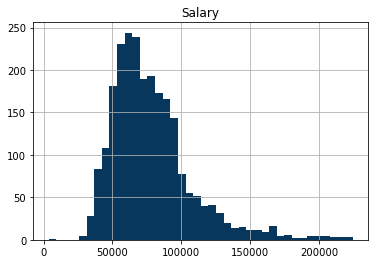

In [98]:
# Histogram on Salary as this is the target variable

df.hist(column= ['Salary'], bins = 40, color = '#07375c')

Text(0.5, 1.0, 'Years of Experience Requirement by Jobs')

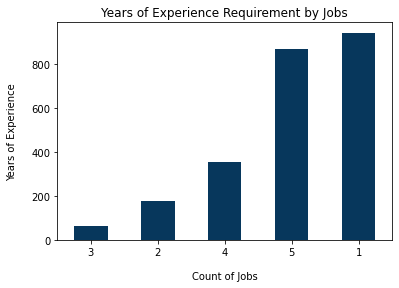

In [99]:
# Plotting visuals

df['Min_years_exp'].value_counts().sort_values().plot(kind='bar', color = '#07375c')
plt.xlabel("Count of Jobs", labelpad=14)
plt.xticks(rotation=360)
plt.ylabel("Years of Experience", labelpad=14)
plt.title("Years of Experience Requirement by Jobs")

Text(0.5, 1.0, 'Work Locations by Jobs')

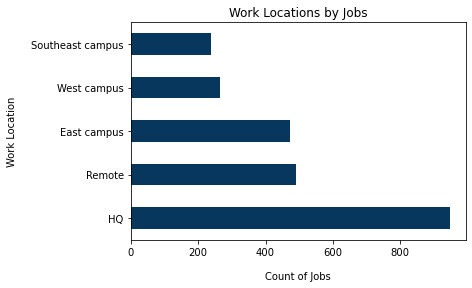

In [100]:
# Location visual

df['Location'].value_counts().plot(kind='barh', color = '#07375c')
plt.xlabel("Count of Jobs", labelpad=14)
plt.ylabel("Work Location", labelpad=14)
plt.title("Work Locations by Jobs")

Text(0.5, 1.0, 'Required Technical Skills by Jobs')

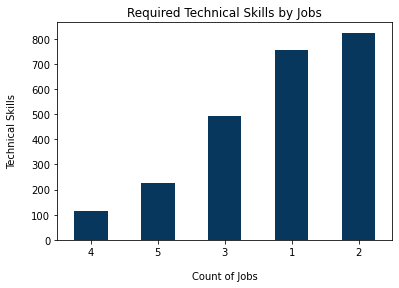

In [101]:
# Location visual

df['Technical'].value_counts().sort_values().plot(kind='bar', color = '#07375c')
plt.xlabel("Count of Jobs", labelpad=14)
plt.xticks(rotation = 360)
plt.ylabel("Technical Skills", labelpad=14)
plt.title("Required Technical Skills by Jobs")

Text(0.5, 1.0, 'Communication Skill Requirement by Jobs')

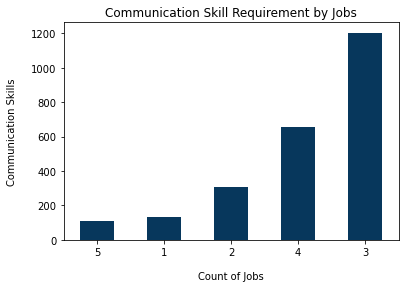

In [102]:
# Location visual

df['Comm'].value_counts().sort_values().plot(kind='bar', color = '#07375c')
plt.xlabel("Count of Jobs", labelpad=14)
plt.xticks(rotation = 360)
plt.ylabel("Communication Skills", labelpad=14)
plt.title("Communication Skill Requirement by Jobs")

Text(0.5, 1.0, 'Number of Hours It Takes to Travel to Work')

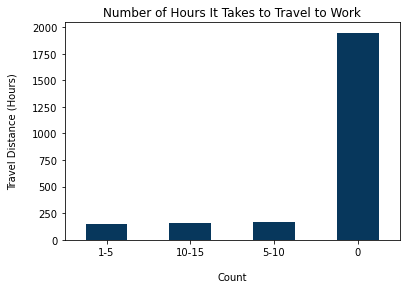

In [103]:
# Location visual

df['Travel'].value_counts().sort_values(ascending= True).plot(kind='bar', color = '#07375c')
plt.xlabel("Count", labelpad=15)
plt.xticks(rotation = 360)
plt.ylabel("Travel Distance (Hours)", labelpad=15)
plt.title("Number of Hours It Takes to Travel to Work")

### Data Prep

In [104]:
# Divide columns into three groups
# Group 1 = Job Description
# Group 2 = Location, Min_years_exp, Technical, Comm, and Travel
# Group 3 = Salary (target variable)

# Create group 1 for job description
text_input_data = df['Job Description']

# Create group 2 for the rest of the columns
input_data = df.drop(['Job Description', 'Salary'], axis = 1)

# Create group 3 to separate the target variable
target_variable = df['Salary']

In [105]:
# Verify the variables are correct

# text_input_data, input_data, target_variable

print("Text Input Data")
print(text_input_data)
print("")
print("Input Data")
print(input_data)
print("")
print("Target Variable")
print(target_variable)

Text Input Data
0       Civil Service Title: Regional Director Mental ...
1       The New York City Comptrollerâ€™s Office Burea...
2       With minimal supervision from the Deputy Commi...
3       OPEN TO CURRENT BUSINESS PROMOTION COORDINATOR...
4       Only candidates who are permanent in the Princ...
                              ...                        
2408    Section 8, also known as the Housing Choice Vo...
2409    The NYC Department of Environmental Protection...
2410    The NYC Department of Environmental Protection...
2411    Under general supervision, with some latitude ...
2412    The New York City Department of Correction (DO...
Name: Job Description, Length: 2413, dtype: object

Input Data
              Location  Min_years_exp  Technical  Comm Travel
0               Remote              5          2     3      0
1               Remote              5          2     4  10-15
2          East campus              5          3     3   5-10
3          East campus             

In [106]:
# Randomly split the data set into 70/30

train_text_set, test_text_set, train_inputs, test_inputs, train_y, test_y = train_test_split(text_input_data, input_data, target_variable, test_size=0.3)

In [107]:
# Print the shapes of the new variables to make sure they match

print("Train Text Shape: ", train_text_set.shape) 
print("Test Text Shape: ", test_text_set.shape)
print("")
print("Train Shape: ", train_inputs.shape)
print("Test Shape: ", test_inputs.shape)
print("")
print("Target Var Train Shape: ", train_y.shape)
print("Target Var Test Shape: ", test_y.shape)

Train Text Shape:  (1689,)
Test Text Shape:  (724,)

Train Shape:  (1689, 5)
Test Shape:  (724, 5)

Target Var Train Shape:  (1689,)
Target Var Test Shape:  (724,)


In [108]:
# We first begin to work with the text column

# Tokenizer and filtering stop words
tfidf_vect = TfidfVectorizer(stop_words='english')

# Fit transform 
train_x_tr = tfidf_vect.fit_transform(train_text_set)

# Transform
test_x_tr = tfidf_vect.transform(test_text_set)

In [109]:
# Print shapes to make sure they match

print("Train Text Shape: ", train_x_tr.shape) 
print("Test Text Shape: ", test_x_tr.shape)

Train Text Shape:  (1689, 9914)
Test Text Shape:  (724, 9914)


In [110]:
# Create Singular Value Decomposition to control for number of columns
# 800 columns provided 89.95% variance which is reasonable

svd = TruncatedSVD(n_components=800, n_iter=10)

In [111]:
# Fit transform the SVD with the train text
train_x_lsa = svd.fit_transform(train_x_tr)

train_x_lsa

array([[ 0.24720598, -0.20327125,  0.11489911, ..., -0.02793279,
         0.02864793, -0.00741146],
       [ 0.17294821, -0.13074886,  0.00477585, ..., -0.0108925 ,
        -0.0487874 ,  0.01456041],
       [ 0.5877761 ,  0.365734  ,  0.13443229, ..., -0.00580571,
         0.00127871,  0.00914039],
       ...,
       [ 0.13385776, -0.10605211, -0.04018447, ...,  0.01886407,
        -0.01027066,  0.01936612],
       [ 0.15340621, -0.12353644, -0.04283056, ...,  0.00603409,
        -0.00106324, -0.00170243],
       [ 0.21722752, -0.05642434,  0.31527024, ..., -0.02696592,
        -0.00868274,  0.01260164]])

In [112]:
# Veryfiy the shape of the train text variable
# THIS IS IMPORTANT 

train_x_lsa.shape

(1689, 800)

In [113]:
# Transform the test text set
test_x_lsa = svd.transform(test_x_tr)

test_x_lsa

array([[ 0.22442943, -0.15304556, -0.07083585, ...,  0.02151242,
         0.00778754, -0.00769884],
       [ 0.18129172, -0.14482415, -0.05639426, ..., -0.00068191,
        -0.01480211, -0.00862177],
       [ 0.25478046, -0.19879586, -0.07065608, ..., -0.00515763,
         0.00539821, -0.01208958],
       ...,
       [ 0.27755586, -0.18287792,  0.03599143, ..., -0.02641954,
        -0.03337113, -0.00415323],
       [ 0.14498797, -0.11293755, -0.07782072, ...,  0.0070384 ,
        -0.00767916,  0.00274849],
       [ 0.26692051, -0.08935042,  0.44355519, ...,  0.00178106,
        -0.01896273,  0.01349564]])

In [114]:
# Verify the shape of test text variable
# THIS IS IMPORTANT

test_x_lsa.shape

(724, 800)

In [115]:
# Look at the variance between the actual columns (9914 columns) and the replaced columns (800 columns)

print(round(svd.explained_variance_.sum() * 100,2), "%")

89.9 %


### Feature Engineering

In [116]:
# Now we work on the remaining columns of the dataframe

# We create a new column derived from the Locatino column in our dataframe
# The new column indicates whether the job location is Remote (1) or On-Campus (0)

# Define function
def binary_location (row):
   if row['Location'] == 'Remote' :
      return 1
   return 0

In [117]:
# Add the new column in train and test inputs 
train_inputs['binary_location'] = train_inputs.apply (lambda row: binary_location(row), axis = 1)

test_inputs['binary_location'] = test_inputs.apply(lambda row: binary_location(row), axis = 1)

<ipython-input-117-6c162c3cd0b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs['binary_location'] = train_inputs.apply (lambda row: binary_location(row), axis = 1)
<ipython-input-117-6c162c3cd0b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs['binary_location'] = test_inputs.apply(lambda row: binary_location(row), axis = 1)


In [118]:
train_inputs.dtypes

Location           object
Min_years_exp       int64
Technical           int64
Comm                int64
Travel             object
binary_location     int64
dtype: object

In [119]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [120]:
# Identify our binary columns

binary_columns = ['binary_location']

In [121]:
# Be careful: numerical columns already includes the binary columns,
# So, we need to remove the binary columns from numerical columns.

for col in binary_columns:
    numeric_columns.remove(col)

In [122]:
binary_columns

['binary_location']

In [123]:
numeric_columns

['Min_years_exp', 'Technical', 'Comm']

In [124]:
categorical_columns

['Location', 'Travel']

In [125]:
# Pipeline

numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [126]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [127]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [128]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('binary', binary_transformer, binary_columns)],
        remainder='passthrough')

In [129]:
# Fit and transform the train data
train_x_transformed = preprocessor.fit_transform(train_inputs)

train_x_transformed

array([[-1.12955755,  0.59306224,  0.9780514 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0979062 ,  0.59306224, -1.25579419, ...,  1.        ,
         0.        ,  0.        ],
       [-1.12955755,  0.59306224,  2.09497419, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.12955755,  0.59306224, -1.25579419, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54104026, -0.23136749, -0.1388714 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.12955755, -0.23136749, -0.1388714 , ...,  0.        ,
         0.        ,  0.        ]])

In [130]:
# Verify the shape of the transformed data
# THIS IS IMPORTANT

train_x_transformed.shape

(1689, 13)

In [131]:
# Transform the test data
test_x_transformed = preprocessor.transform(test_inputs)

test_x_transformed

array([[-1.12955755, -0.23136749, -0.1388714 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54104026,  0.59306224, -2.37271699, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54104026,  0.59306224, -1.25579419, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.12955755, -0.23136749,  0.9780514 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.54104026,  2.24192171, -1.25579419, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0979062 , -1.05579722,  0.9780514 , ...,  0.        ,
         0.        ,  0.        ]])

In [132]:
# Verify the shape of the transformed data
# THIS IS IMPORTANT

test_x_transformed.shape

(724, 13)

In [133]:
# Transform the test data
test_x_transformed = preprocessor.transform(test_inputs)

test_x_transformed

array([[-1.12955755, -0.23136749, -0.1388714 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.54104026,  0.59306224, -2.37271699, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.54104026,  0.59306224, -1.25579419, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.12955755, -0.23136749,  0.9780514 , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.54104026,  2.24192171, -1.25579419, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0979062 , -1.05579722,  0.9780514 , ...,  0.        ,
         0.        ,  0.        ]])

In [134]:
# Verify the shape of the transformed data
# THIS IS IMPORTANT

test_x_transformed.shape

(724, 13)

In [135]:
# Concatenate the variables (Group 1 and Group 2)

# Concatenate the test variables
test_x = np.concatenate((test_x_lsa, test_x_transformed), axis = 1)

# Concatenate the train variables
train_x = np.concatenate((train_x_lsa, train_x_transformed), axis = 1)

In [136]:
# Verify the shape of the concatenated variables
# THIS SHOULD ADD UP BETWEEN THE 2 GROUPS

# 800 columns from Text group + 13 column from the Other group
# Totalling 813 columns

print("Final Train Shape: ", train_x.shape)

print("Final Test Shape: ", test_x.shape)

Final Train Shape:  (1689, 813)
Final Test Shape:  (724, 813)


### Find the Baseline

In [137]:
# First find the average value of the target

mean_value = np.mean(train_y)

mean_value

78566.0307874482

In [138]:
# Predict all values as the mean

baseline_pred = np.repeat(mean_value, len(test_y))

baseline_pred

array([78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
       78566.03078745, 78566.03078745, 78566.03078745, 78566.03078745,
      

In [139]:
# Calculate the baseline

baseline_mse = mean_squared_error(test_y, baseline_pred)

baseline_rmse = np.sqrt(baseline_mse)

print('Baseline RMSE: {}' .format(baseline_rmse))

Baseline RMSE: 28294.892856870818


### Models
#### Decision Tree

In [140]:
tree_reg = DecisionTreeRegressor(min_samples_leaf = 10, max_depth=6) 

tree_reg.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10)

In [141]:
#Train RMSE
train_predict = tree_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_predict)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 20220.445442072396


In [142]:
#Test RMSE
test_predict = tree_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_predict)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 24783.611124846615


#### Voting Regressor

In [143]:
# Voting Regressor Without Weights
# Decision Tree, Support Vector Machine, and Stochastic Gradient Descent models

dtree_reg = DecisionTreeRegressor(min_samples_leaf = 10, max_depth = 30)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.001, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), 
                        ('svr', svm_reg), 
                        ('sgd', sgd_reg)])

voting_reg.fit(train_x, train_y)

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(max_depth=30,
                                                   min_samples_leaf=10)),
                            ('svr', SVR(C=10, epsilon=0.001)),
                            ('sgd', SGDRegressor(max_iter=10000))])

In [144]:
#Train RMSE
train_pred = voting_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 16057.956121472827


In [145]:
#Test RMSE
test_pred = voting_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 20281.029422786407


In [146]:
# Voting Regressor With Weights
# SGDRegressor seems to be performing better, therefore it has the most weight

dtree_reg = DecisionTreeRegressor(min_samples_leaf = 10, max_depth = 30)
svm_reg = SVR(kernel="rbf", C=10, epsilon=0.001, gamma='scale') 
sgd_reg = SGDRegressor(max_iter=10000, tol=1e-3)

voting_reg = VotingRegressor(
            estimators=[('dt', dtree_reg), ('svr', svm_reg), ('sgd', sgd_reg)],
                        weights=[0.2, 0.2, 0.6])

voting_reg.fit(train_x, train_y)

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(max_depth=30,
                                                   min_samples_leaf=10)),
                            ('svr', SVR(C=10, epsilon=0.001)),
                            ('sgd', SGDRegressor(max_iter=10000))],
                weights=[0.2, 0.2, 0.6])

In [147]:
#Train RMSE
train_pred = voting_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 13772.79187772038


In [148]:
#Test RMSE
test_pred = voting_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 18620.23744442495


#### Boosting Model

In [149]:
# Stochastic Gradient Boosting

gb_reg = GradientBoostingRegressor(max_depth=4, n_estimators=200, 
                                   learning_rate=0.1, subsample=0.75) 

gb_reg.fit(train_x, train_y)

GradientBoostingRegressor(max_depth=4, n_estimators=200, subsample=0.75)

In [150]:
#Train RMSE
train_pred = gb_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 3397.1946180852715


In [151]:
#Test RMSE
test_pred = gb_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 15318.12640918705


In [152]:
# Checking for other values that will avoid overfitting
# Stochastic Gradient Boosting
gb_reg = GradientBoostingRegressor(max_depth=4, n_estimators=100, 
                                   learning_rate=0.01, subsample=0.75) 

gb_reg.fit(train_x, train_y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, subsample=0.75)

In [153]:
#Train RMSE
train_pred = gb_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 22669.303828703625


In [154]:
#Test RMSE
test_pred = gb_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 24198.69672330336


#### Neural Network

In [155]:
# Multi-Layer Perceptron with early stopping

mlp_reg = MLPRegressor(hidden_layer_sizes=(500,), max_iter=2000, early_stopping=True)

mlp_reg.fit(train_x, train_y)

c:\Users\shyam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=(500,), max_iter=2000)

In [156]:
#Train RMSE
train_predict = mlp_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_predict)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 13826.326680175935


In [157]:
#Test RMSE
test_predict = mlp_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_predict)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 18592.083704913694


In [158]:
# See if anything changes without early stopping

mlp_reg = MLPRegressor(hidden_layer_sizes=(500,), max_iter=2000)

mlp_reg.fit(train_x, train_y)

c:\Users\shyam\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(500,), max_iter=2000)

In [159]:
#Train RMSE
train_predict = mlp_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_predict)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 12232.870904743037


In [160]:
#Test RMSE
test_predict = mlp_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_predict)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 17932.036177971666


#### Grid Search

In [161]:
# Grid Search on Gradient Boosting using 5-fold cross validation with 10 number of iterations

param_randomgrid = [
    {'min_samples_leaf': np.arange(10, 30), 
     'max_depth': np.arange(10,30),
    'learning_rate': np.arange(0.01,0.1)}
  ]

Rgrid_search = RandomizedSearchCV(GradientBoostingRegressor(), param_randomgrid, cv=5, n_iter=10,
                           scoring='neg_mean_squared_error', verbose=1, n_jobs = -1,
                           return_train_score=True)

Rgrid_search.fit(train_x, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions=[{'learning_rate': array([0.01]),
                                         'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29]),
                                         'min_samples_leaf': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [162]:
# Getting the grid search results

cvres = Rgrid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

23362.404705874855 {'min_samples_leaf': 17, 'max_depth': 23, 'learning_rate': 0.01}
23937.174375018403 {'min_samples_leaf': 25, 'max_depth': 27, 'learning_rate': 0.01}
23505.967998639022 {'min_samples_leaf': 18, 'max_depth': 20, 'learning_rate': 0.01}
23604.376768197566 {'min_samples_leaf': 20, 'max_depth': 24, 'learning_rate': 0.01}
23580.773801529947 {'min_samples_leaf': 21, 'max_depth': 26, 'learning_rate': 0.01}
23397.916530027782 {'min_samples_leaf': 14, 'max_depth': 26, 'learning_rate': 0.01}
22850.98665613241 {'min_samples_leaf': 11, 'max_depth': 24, 'learning_rate': 0.01}
23378.580195282047 {'min_samples_leaf': 17, 'max_depth': 11, 'learning_rate': 0.01}
23639.832233066158 {'min_samples_leaf': 22, 'max_depth': 26, 'learning_rate': 0.01}
23496.986348504182 {'min_samples_leaf': 18, 'max_depth': 14, 'learning_rate': 0.01}


In [163]:
# Checking what the best parameters are

Rgrid_search.best_params_

{'min_samples_leaf': 11, 'max_depth': 24, 'learning_rate': 0.01}

In [164]:
# Checking what the best estimators are

Rgrid_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=24, min_samples_leaf=11)

In [165]:
#Train RMSE
train_predict = Rgrid_search.best_estimator_.predict(train_x)

train_mse = mean_squared_error(train_y, train_predict)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

Train RMSE: 14820.371354355308


In [166]:
#Test RMSE
test_predict = Rgrid_search.best_estimator_.predict(test_x)

test_mse = mean_squared_error(test_y, test_predict)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

Test RMSE: 19792.498188122634


#### Best Model (Gradient Boosting Regressor)

In [191]:
# Stochastic Gradient Boosting

gb_reg = GradientBoostingRegressor(max_depth=4, n_estimators=200, 
                                   learning_rate=0.1, subsample=0.75, 
                                   verbose= 1) 

gb_reg.fit(train_x, train_y)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1   810243598.8640    23624966.4244           58.75s
         2   823708176.5935    30582706.2581           54.29s
         3   753467606.2595    15067808.4041           52.61s
         4   688533902.5339    24027155.1643           51.40s
         5   655530831.4668    16145999.9486           50.61s
         6   622522369.2895    15309938.4983           50.20s
         7   604794968.8729    15457242.3599           49.93s
         8   561133689.9775    14486224.7251           49.70s
         9   537111416.3709    16834781.1533           49.38s
        10   507705953.3326    17415335.3815           49.09s
        20   328786770.7568     4472561.3292           46.03s
        30   235597891.2843     4374804.6904           43.45s
        40   171480450.9652     2331945.3006           40.90s
        50   132019251.2135      683751.1006           38.38s
        60    94846169.5508     -459596.7585           35.80s
       

GradientBoostingRegressor(max_depth=4, n_estimators=200, subsample=0.75,
                          verbose=1)

In [192]:
#Train RMSE
train_pred = gb_reg.predict(train_x)

train_mse = mean_squared_error(train_y, train_pred)

train_rmse = np.sqrt(train_mse)

print('Train RMSE: {}' .format(train_rmse))

print("Before", 3397.1946180852715)

Train RMSE: 3248.7873587803115
Before 3397.1946180852715


In [193]:
#Test RMSE
test_pred = gb_reg.predict(test_x)

test_mse = mean_squared_error(test_y, test_pred)

test_rmse = np.sqrt(test_mse)

print('Test RMSE: {}' .format(test_rmse))

print("Before", 15318.12640918705)

Test RMSE: 15317.969045024809
Before 15318.12640918705


In [243]:
# Create a new dataframe off the testing dataset to place the predicted values side by side

predicted_test_text_set = pd.DataFrame(test_text_set.copy())
predicted_test_inputs = pd.DataFrame(test_inputs.copy())

# # Concatenate the testsets
predicted_test_df = pd.concat([predicted_test_text_set, predicted_test_inputs], axis = 1)
predicted_test_df.head()

,Job Description,Location,Min_years_exp,Technical,Comm,Travel,binary_location
765,The New York City Housing Authority (NYCHA) is...,HQ,1,2,3,0,0
2387,"Hiring Rate: $62,272.00 (Flat Rate-Annual) ...",HQ,4,3,1,5-10,0
2162,The Executive Director for Regulatory Reform w...,East campus,4,3,2,0,0
1833,The NYC Department of Environmental Protection...,East campus,2,3,2,0,0
1814,The Department of Transportationâ€™s (DOT) mis...,East campus,2,2,2,0,0


In [244]:
# Insert the predicted values on the testing dataset

predicted_test_df['predicted_salary'] = test_pred
predicted_test_df['predicted_salary'] = round(predicted_test_df['predicted_salary'],2)
predicted_test_df.head()

,Job Description,Location,Min_years_exp,Technical,Comm,Travel,binary_location,predicted_salary
765,The New York City Housing Authority (NYCHA) is...,HQ,1,2,3,0,0,145942.17
2387,"Hiring Rate: $62,272.00 (Flat Rate-Annual) ...",HQ,4,3,1,5-10,0,71961.41
2162,The Executive Director for Regulatory Reform w...,East campus,4,3,2,0,0,74629.12
1833,The NYC Department of Environmental Protection...,East campus,2,3,2,0,0,58551.90
1814,The Department of Transportationâ€™s (DOT) mis...,East campus,2,2,2,0,0,65695.64


In [246]:
test_y.head()

765     149752
2387     64653
2162     69530
1833     51932
1814     60218
Name: Salary, dtype: int64